# Controlling figure aesthetics in seaborn

This notebook provides a brief introduction to the [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) functions that let you manipulate the look of matplotlib figures and choose color palettes that will reveal interesting patterns in your data.

For much more information, you can check out the detailed tutorials on [figure style](http://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html) and [color palettes](http://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html) at the seaborn documentation.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(9221999)

## Setting the figure style

Let's define a simple function to plot some offset sine waves to help us see the different stylistic parameters we can tweak.

In [4]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

This is what the plot looks like with matplotlib defaults:

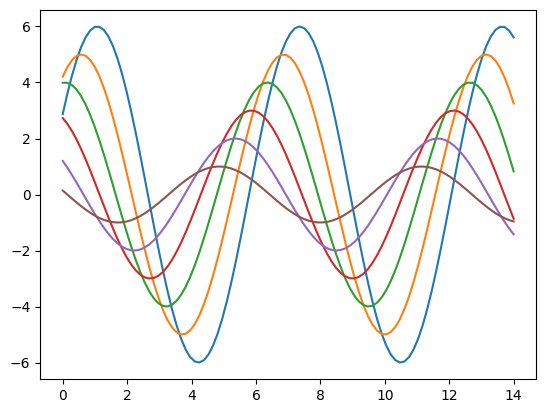

In [5]:
sinplot()

To switch to seaborn defaults, simply import the package.

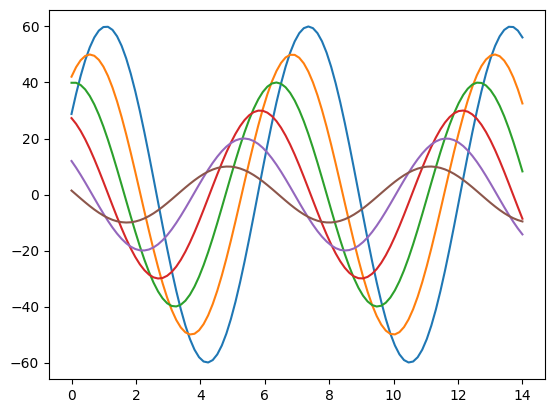

In [6]:
import seaborn as sns
sinplot(flip=10)

By default seaborn plots with the `"darkgrid"` theme, but there are a number of other options:

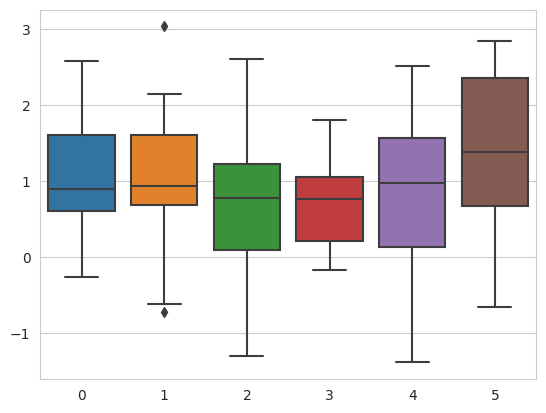

In [7]:
sns.set_style("whitegrid")
data = 1 + np.random.randn(20, 6)
sns.boxplot(data=data);

Seaborn also has some utility functions to easily manipulate the figure outside of what can be done through the matplotlib rc parameters.

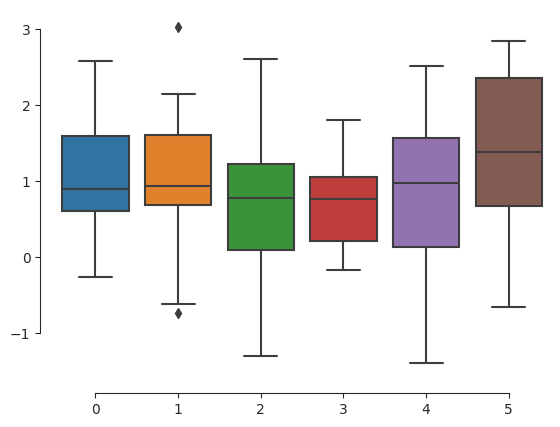

In [ ]:
sns.set_style("ticks")
f, ax = plt.subplots()
sns.boxplot(data=data)
sns.despine(offset=10, trim=True)

## Scaling figures for different contexts

The seaborn defaults are tailored to make plots that are well-proportioned for vieweing on your own computer screen. There are several other plotting contexts that let you quickly change the scale of plot elements for use in contexts where larger or smaller figures are used. you can also independently scale the fonts within each context.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:258: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


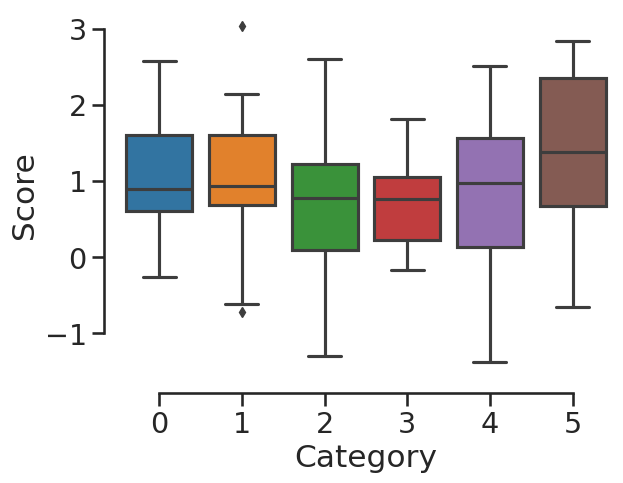

In [ ]:
sns.set_context("talk", font_scale=1.25)
sns.boxplot(data=data)
sns.utils.axlabel("Category", "Score")
sns.despine(offset=10, trim=True);

## Using color palettes

Seaborn also tries to make it easy to choose color palettes that are attractive and informative. The default palette is based on the default matplotlib cycle, but with flatter colors:

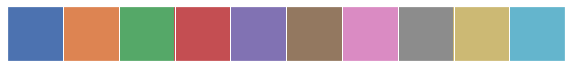

In [ ]:
sns.set()
current_palette = sns.color_palette()
sns.palplot(current_palette)

It's also easy to get evenly spaced hues in the `husl` or `hls` color spaces.

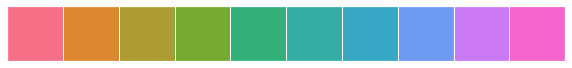

In [ ]:
sns.palplot(sns.color_palette("husl", 10))

You can use the `color_palette` function to get discretized colors from any matplotlib colormap.

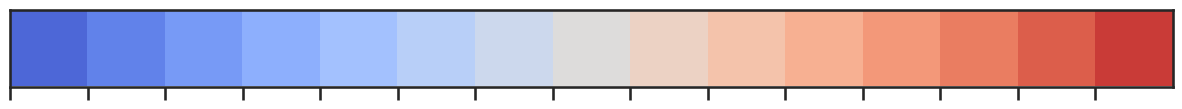

In [ ]:
sns.palplot(sns.color_palette("coolwarm", 15))

When working with matplotlib palettes that are naturally qualitative, seaborn handles them properly.

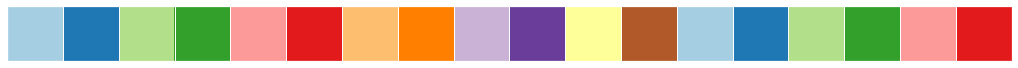

In [ ]:
sns.palplot(sns.color_palette("Paired", 18))

Many seaborn functions use the `color_palette` function behind the scenes, and thus accept any of the valid arguments for their `palette` parameter.

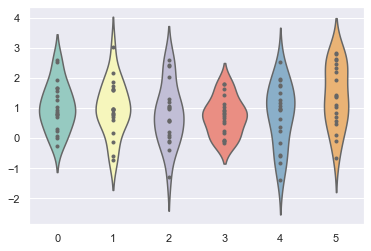

In [ ]:
sns.violinplot(data=data, inner="points", palette="Set3");

There is also a flexible interface to the cubehelix system.

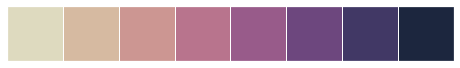

In [ ]:
sns.palplot(sns.cubehelix_palette(8, start=2.5, rot=.75))

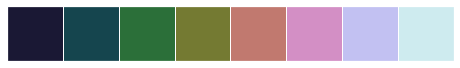

In [ ]:
# Default Matplotlib Cubehelix version:
sns.palplot(sns.color_palette("cubehelix", 8))

<AxesSubplot:>

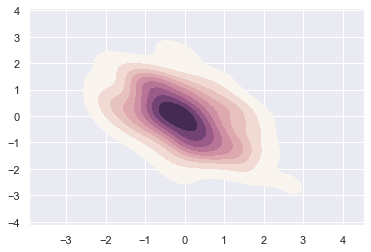

In [ ]:
# Density Plot with Seaborn defaults:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T

sample_cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x=x, y=y, cmap=sample_cmap, shade=True)

Two other functions allow you to create custom palettes. The first takes a color and creates a blend with a very dark gray.

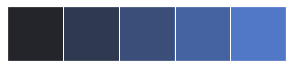

In [ ]:
sns.palplot(sns.dark_palette("#5178C7", 5))

<AxesSubplot:>

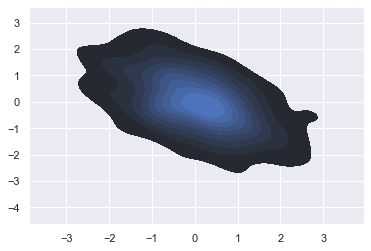

In [ ]:
# Density Plot with Seaborn dark:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T

sample_cmap = sns.dark_palette("#5178C7", 8, as_cmap=True)
sns.kdeplot(x=x, y=y, cmap=sample_cmap, shade=True)

A more general function for making custom palettes interpolates between an arbitrary number of seed points.

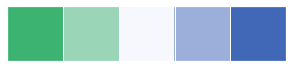

In [ ]:
sns.palplot(sns.blend_palette(["mediumseagreen", "ghostwhite", "#4168B7"], 5))

## Interactive widget

interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

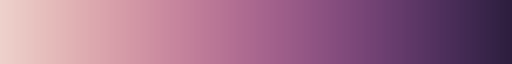

In [ ]:
sns.choose_cubehelix_palette(as_cmap=True)

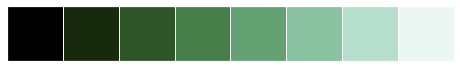

In [ ]:
sns.palplot(sns.cubehelix_palette(n_colors=8, start=1.7, rot=0.2, dark=0, light=.95, reverse=True))